# Part 6 Logistic regression

In [260]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [261]:
df = pd.read_csv('zuucrew.csv')
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
3,Nisal Gamage,1,74.5,63.9,7,0,76.8,1.7,Production-Ready ML Systems,100.0
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1


In [262]:
df = df[df['CourseName']=='Foundations of ML']
df["Pass_Fail"] = (df["CapstoneScore"] >= 75).astype(int)

df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore,Pass_Fail
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3,0
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8,1
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4,0
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1,0
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2,0


In [ ]:
X = df['TotalHours'].values
y = df['Pass_Fail'].values


print(X, y)


X_mean = np.mean(X)
X_std = np.std(X)
X_normalized = (X - X_mean) / X_std
X_bias_normalized = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized] # Adding bias term for intercept and normalizing


[43.7 95.6 75.9 24.  88.  97.3 26.5 57.2 48.9 36.2 65.1 22.6 36.3 51.
 56.3 15.9 96.9 18.8 54.6 91.8 69.6 38.1 26.6 97.3 94.6 27.6 39.3 34.4
 42.1 35.3 98.8 27.9 10.5 73.6 75.6 79.4 16.7 39.8 15.7 67.4 74.2 78.5
 60.5 79.4 54.4 57.  48.5 12.3 67.3 38.3 91.7 32.4 46.9 93.7 67.  88.4
 90.3 58.5 82.7 83.6 10.6 56.  47.6 94.9 39.1 56.7 73.3 42.7 97.5 35.6
 13.3 55.2] [0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0]


In [264]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [265]:
def compute_logistic_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-15
    pos_component = np.sum(y * np.log(h + epsilon))
    neg_component = np.sum((1 - y) * np.log(1 - h + epsilon))
    return (-1/m) * (pos_component + neg_component)

In [266]:
def compute_logistic_gradients(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    gradients = (1/m) * X.T.dot(h - y)
    return gradients


In [286]:
def logistic_gradient_descent(X, y, learning_rate=0.1, iterations=10000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    y = y.reshape(-1, 1)
    cost_history = []

    for i in range(iterations):
        gradients = compute_logistic_gradients(X, y, theta)
        theta -= learning_rate * gradients
        cost = compute_logistic_cost(X, y, theta)
        cost_history.append(cost)

        if i % 100 == 0:
           
            print(f"Iteration {i}: Cost = {cost} Theta = {theta.ravel()}")

    return theta, cost_history

In [268]:
def predict_proba(X, theta):
    return sigmoid(X.dot(theta))

In [269]:
def predict_class(X, theta, threshold=0.5):
    probs = predict_proba(X, theta)
    return (probs >= threshold).astype(int)

Iteration 0: Cost = 0.6765078804761052 Theta = [-0.03333333  0.02395576]
Iteration 100: Cost = 0.2774277130348578 Theta = [-1.48423212  1.14701906]
Iteration 200: Cost = 0.2228331647025461 Theta = [-2.01799002  1.64791259]
Iteration 300: Cost = 0.19814227405881057 Theta = [-2.37823278  1.98806438]
Iteration 400: Cost = 0.18319216194433727 Theta = [-2.66212015  2.24983478]
Iteration 500: Cost = 0.17284339589591274 Theta = [-2.90063462  2.46537791]
Iteration 600: Cost = 0.16510606112455622 Theta = [-3.10832921  2.65024676]
Iteration 700: Cost = 0.15902472717327698 Theta = [-3.29343482  2.81309938]
Iteration 800: Cost = 0.15407479586185494 Theta = [-3.46112675  2.95926577]
Iteration 900: Cost = 0.149940384237394 Theta = [-3.6148969  3.0922759]
Iteration 1000: Cost = 0.1464179954161583 Theta = [-3.75722574  3.21459866]
Iteration 1100: Cost = 0.14336958535422573 Theta = [-3.88994639  3.32803491]
Iteration 1200: Cost = 0.14069761193643363 Theta = [-4.01445681  3.43394267]
Iteration 1300: Cos

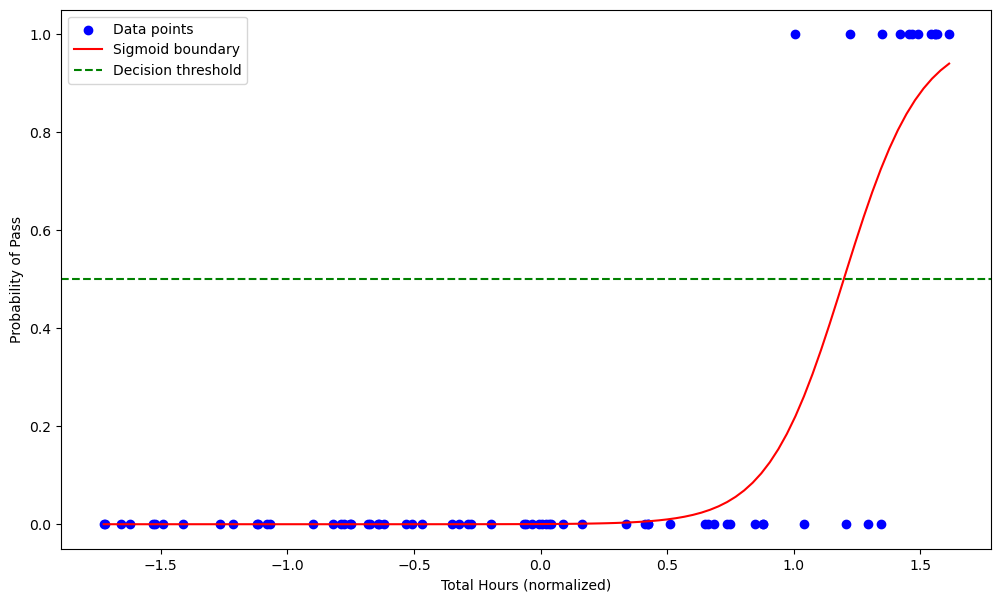

In [ ]:
theta, cost_history = logistic_gradient_descent(X_bias_normalized, y, learning_rate=0.1, iterations=10000)
print("Final theta:", theta)
# Predict
y_pred_probs = predict_proba(X_bias_normalized, theta)
y_pred_class = predict_class(X_bias_normalized, theta)

print("Predicted probabilities:", y_pred_probs.ravel())
print("Predicted classes:", y_pred_class.ravel())


# Smooth curve
X_curve = np.linspace(X_normalized.min(), X_normalized.max(), 100).reshape(-1,1)
X_curve_bias = np.c_[np.ones((X_curve.shape[0], 1)), X_curve]
y_curve = predict_proba(X_curve_bias, theta)

plt.figure(figsize=(12, 7))
plt.scatter(X_normalized, y, color='blue', label="Data points")
plt.plot(X_curve, y_curve, color='red', label="Sigmoid boundary")
plt.axhline(0.5, color='green', linestyle='--', label="Decision threshold")
plt.xlabel("Total Hours (normalized)")
plt.ylabel("Probability of Pass")
plt.legend()
plt.show()

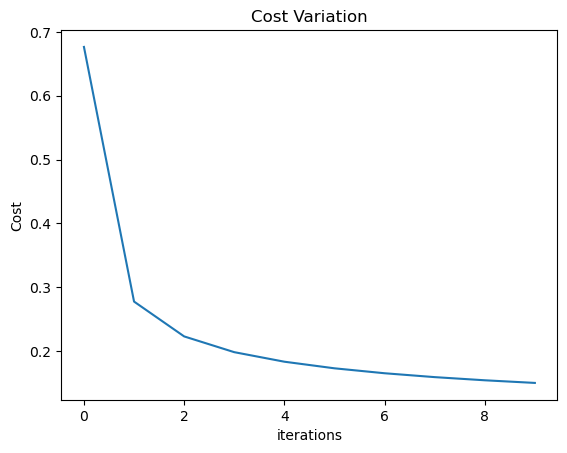

In [271]:
plt.plot(cost_history)
plt.title("Cost Variation")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()